In [1]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
! pip install yellowbrick

In [2]:
#Import website carbon data
data1 = pd.read_excel('C:/Users/tochi/Desktop/WEBSITECARBON DATA.xlsx')
data1

,URL,WEIGHT_OF_CO2_per_time_visited(grams),GREEN_HOSTING,WEIGHT_OF_CARBON(In_grams_yearly),Energy(Kwh)
0,www.amazon.com,1.69,NO,203340.0,428
1,www.ebay.com,1.48,NO,177620.0,374
2,www.rakuten.com,0.68,NO,82180.0,173
3,www.walmart.com,1.30,NO,155760.0,328
4,www.thekrogerco.com,11.87,NO,1424640.0,2999
...,...,...,...,...,...
95,www.shell.co.uk,0.44,NO,327510.0,110
96,www.jackinthebox.com,2.73,YES,463660.0,689
97,www.exxonmobil.co.uk,3.86,NO,138870.0,976
98,www.tesco.com,1.16,NO,216740.0,292


In [3]:
#import ecograder data
data2 = pd.read_excel('C:/Users/tochi/Desktop/ECOGRADER DATA.xlsx')
data2

,URL,Score(percentage),Google_page_insights,HTTP_REQUEST,FINDABILITY(Mozdaq),GREEN_HOSTING
0,www.amazon.com,0.30,84,369,9.2,NO
1,www.ebay.com,0.35,73,242,8.4,NO
2,www.rakuten.com,0.39,79,105,6.5,NO
3,www.walmart.com,0.32,67,115,5.3,NO
4,www.thekrogerco.com,0.39,31,224,5.5,NO
...,...,...,...,...,...,...
95,www.shell.co.uk,0.54,82,34,5.5,NO
96,www.jackinthebox.com,0.34,44,92,5.9,YES
97,www.exxonmobil.co.uk,0.33,94,128,4.0,NO
98,www.tesco.com,0.41,63,141,3.3,NO


In [4]:
#merge the two data with their common columns
data_merged = pd.merge(data1, data2, on = ['GREEN_HOSTING', 'URL'])
data_merged

,URL,WEIGHT_OF_CO2_per_time_visited(grams),GREEN_HOSTING,WEIGHT_OF_CARBON(In_grams_yearly),Energy(Kwh),Score(percentage),Google_page_insights,HTTP_REQUEST,FINDABILITY(Mozdaq)
0,www.amazon.com,1.69,NO,203340.0,428,0.30,84,369,9.2
1,www.ebay.com,1.48,NO,177620.0,374,0.35,73,242,8.4
2,www.rakuten.com,0.68,NO,82180.0,173,0.39,79,105,6.5
3,www.walmart.com,1.30,NO,155760.0,328,0.32,67,115,5.3
4,www.thekrogerco.com,11.87,NO,1424640.0,2999,0.39,31,224,5.5
...,...,...,...,...,...,...,...,...,...
94,www.shell.co.uk,0.44,NO,327510.0,110,0.54,82,34,5.5
95,www.jackinthebox.com,2.73,YES,463660.0,689,0.34,44,92,5.9
96,www.exxonmobil.co.uk,3.86,NO,138870.0,976,0.33,94,128,4.0
97,www.tesco.com,1.16,NO,216740.0,292,0.41,63,141,3.3


In [5]:
#drop columns with string variable
data_merged_without_url = data_merged.drop(data_merged.columns[[0]],axis =1)

In [6]:
#convert the column with boolean values to nominal
data_merged_without_url['GREEN_HOSTING'] =data_merged_without_url['GREEN_HOSTING'].map(dict(YES=1, NO=0))

<AxesSubplot:>

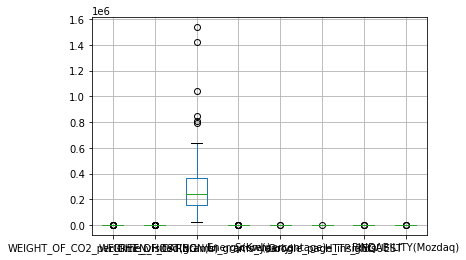

In [7]:
#create a box plot to check for outliers
data_merged_without_url.boxplot()

In [8]:
data_merged_without_url

,WEIGHT_OF_CO2_per_time_visited(grams),GREEN_HOSTING,WEIGHT_OF_CARBON(In_grams_yearly),Energy(Kwh),Score(percentage),Google_page_insights,HTTP_REQUEST,FINDABILITY(Mozdaq)
0,1.69,0,203340.0,428,0.30,84,369,9.2
1,1.48,0,177620.0,374,0.35,73,242,8.4
2,0.68,0,82180.0,173,0.39,79,105,6.5
3,1.30,0,155760.0,328,0.32,67,115,5.3
4,11.87,0,1424640.0,2999,0.39,31,224,5.5
...,...,...,...,...,...,...,...,...
94,0.44,0,327510.0,110,0.54,82,34,5.5
95,2.73,1,463660.0,689,0.34,44,92,5.9
96,3.86,0,138870.0,976,0.33,94,128,4.0
97,1.16,0,216740.0,292,0.41,63,141,3.3


In [9]:
#use percentile to find the NAs in the column with missing data
for x in ['WEIGHT_OF_CARBON(In_grams_yearly)']:
    q75,q25 = np.percentile(data_merged_without_url.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_merged_without_url.loc[data_merged_without_url[x] < min,x] = np.nan
    data_merged_without_url.loc[data_merged_without_url[x] > max,x] = np.nan

In [10]:
#call function to sum up the NAs
data_merged_without_url.isnull().sum()

WEIGHT_OF_CO2_per_time_visited(grams)    0
GREEN_HOSTING                            0
WEIGHT_OF_CARBON(In_grams_yearly)        6
Energy(Kwh)                              0
Score(percentage)                        0
Google_page_insights                     0
HTTP_REQUEST                             0
FINDABILITY(Mozdaq)                      0
dtype: int64

In [11]:
#replace NAs with median value for that column
missing_col = ['WEIGHT_OF_CARBON(In_grams_yearly)']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 data_merged_without_url.loc[data_merged_without_url.loc[:,i].isnull(),i]= data_merged_without_url.loc[:,i].median()

In [12]:
#call function to sum up the NAs
data_merged_without_url.isnull().sum()

WEIGHT_OF_CO2_per_time_visited(grams)    0
GREEN_HOSTING                            0
WEIGHT_OF_CARBON(In_grams_yearly)        0
Energy(Kwh)                              0
Score(percentage)                        0
Google_page_insights                     0
HTTP_REQUEST                             0
FINDABILITY(Mozdaq)                      0
dtype: int64

In [13]:
data_merged_without_url
data_merged_without_url.to_csv('C:/Users/tochi/Desktop/carbonfootprint_data.csv', index=False)

In [14]:
#save new dataframe to CSv
data_merged_without_url.to_csv('C:/Users/tochi/Desktop/merged_data.csv', index=False)